## Project Phase 2
### Group 66
### Names & Student ID:
<ol>
    <b>
    <li>Yogesh Haresh Bojja(s3789918)</li>
    <li>Pankaj Rajendra Jagtap(s3789922)</li>
    </b>
</ol>

## Table of Content

* [1.Introduction](#1)
    * [1.1.Report Overview](#1_1)
    * [1.2.Overview of Methodology](#1_2)
* [2.Predictive Modelling](#2)
    * [2.1.Feature Selection](#2_1)
    * [2.2.Model Fitting & Tuning](#2_2)
        * [2.2.1.KNN classifier](#2_2_1)
        * [2.2.2.Descision Tree classifier](#2_2_2)
        * [2.2.3.Random Forest Classifier](#2_2_3)
        * [2.2.4.SVM classifier](#2_2_4)
    * [2.3. Model Comparison](#2_3)
* [3.Critique & Limitations](#3)
* [4.Summary & Conclusions](#4)
    * [4.1.Project Summary](#4_1)
    * [4.2.Summary of Findings](#4_2)
    * [4.3.Conclusions](#4_3)
* [5.Refrences](#5)

### 1.Introduction: <a class = "anchor" id = "1"></a>
Every year around 17 million people die due to Cardiovascular diseases. This mainly consists of heart failures. There are 
various laboratory tests available through which a person can obtain some useful results. For example, Creatinine phosphokinase
responsible in regeneration of ATP, when in excess can lead to numerous heart related diseases. In the same way there are other 
components present in the body which can guide us to keep a check on the progression of heart the failure. Results of these 
different tests and some daily habits and some other features can be used in Machine Learning to predict the survival rate of a 
person from Cardiovascular disease which can be unseen by a doctor.

#### 1.1.Report Overview: <a class = "anchor" id = "1_1"></a>
In this task we used Feature Selection to select the best attributes from our dataset, so that we can use them to accurately build our model. Before performing any Feature Engineering task, we had to do pre-processing of the data which was mentioned in the phase 1 of our report. To support our Feature selection results we have also done a p-test. After selecting the best features, we have used them to build four models. We have built our model using KNN classifier, Decision Tree classifier, Random Forest Classifier and SVM classifier. We have also done fine tuning and performance tuning for each of these algorithms. After this we have compared these algorithms using paired t-tests so that we could obtain the best model for our given dataset.

#### 1.2.Overview of Methodology: <a class = "anchor" id = "1_2"></a>
We will be using four different algorithms. KNN classifier, Decision Tree Classifier, Random Forest Classifier and SVM Classifier are the algorithms that we have used. For each of these algorithms we will do parameter tuning, so that we can get the best results. Different parameter values will be set for each algorithm and best result out of them will be selected. We would then do a paired t-test between these algorithms to find statistical significance.

### 2.Predictive Modelling: <a class = "anchor" id = "2"></a>


#### 2.1.Feature Selection: <a class = "anchor" id = "2_1"></a>
We have done Feature Selection using Fscore, Mutual Information and Random Forest. We calculate performance metrics for each of these methods and for Full set of features. We then do a paired t-tests of these methods with Full Features to check their significance. But before that let us preprocess the data as mentioned in the phase 1 of our report.

In [1]:
#Importing Libraries
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import feature_selection as fs
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

In [2]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) 

In [3]:
data_frame = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [4]:
data_frame.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


Referring to the processing of data that was done in phase 1, we pre-process our given data and perform Label Encoding, One-hot
Encoding and Min-Max Scaling. In pre-processing step, we have also split columns of our dataset into Data and target. 

In [5]:
#splitting dataset into Data and target
Data = data_frame.drop(columns = 'DEATH_EVENT')
target = data_frame['DEATH_EVENT']

In [6]:
#Label Encoding
labels = ['0-19', '20-39', '40-59', '60 +']
Data['age'] = pd.cut(Data['age'],
                              bins=[0, 20, 40, 60, 200],
                              labels=labels)

labels = ['low', 'normal', 'high']
Data['platelets'] = pd.cut(Data['platelets'],
                              bins=[0, 150000, 450000, 1000000],
                              labels=labels)

labels = ['low', 'normal', 'high']
Data['serum_creatinine'] = pd.cut(Data['serum_creatinine'],
                              bins=[0, 0.4, 1.5, 15],
                              labels=labels)

labels = ['low', 'normal', 'high']
Data['serum_sodium'] = pd.cut(Data['serum_sodium'],
                              bins=[0, 135, 145, 1000],
                              labels=labels)

In [7]:
#One hot encoding and min-max scaling
Data = pd.get_dummies(Data, columns=['age', 'platelets', 'serum_creatinine', 'serum_sodium'])

min_val = min(Data['creatinine_phosphokinase'])
max_val = max(Data['creatinine_phosphokinase'])
def min_max_scaler(val):
    return(round((val-min_val)/(max_val-min_val), 4))
Data['creatinine_phosphokinase'] = Data['creatinine_phosphokinase'].apply(min_max_scaler)

min_val = min(Data['ejection_fraction'])
max_val = max(Data['ejection_fraction'])
def min_max_scaler(val):
    return(round((val-min_val)/(max_val-min_val), 4))
Data['ejection_fraction'] = Data['ejection_fraction'].apply(min_max_scaler)

min_val = min(Data['time'])
max_val = max(Data['time'])
def min_max_scaler(val):
    return(round((val-min_val)/(max_val-min_val), 4))
Data['time'] = Data['time'].apply(min_max_scaler)

In [8]:
#dataset after pre-processing
Data.head(10)

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,sex,smoking,time,age_0-19,age_20-39,age_40-59,age_60 +,platelets_low,platelets_normal,platelets_high,serum_creatinine_low,serum_creatinine_normal,serum_creatinine_high,serum_sodium_low,serum_sodium_normal,serum_sodium_high
0,0,0.0713,0,0.0909,1,1,0,0.0000,0,0,0,1,0,1,0,0,0,1,1,0,0
1,0,1.0000,0,0.3636,0,1,0,0.0071,0,0,1,0,0,1,0,0,1,0,0,1,0
2,0,0.0157,0,0.0909,0,1,1,0.0107,0,0,0,1,0,1,0,0,1,0,1,0,0
3,1,0.0112,0,0.0909,0,1,0,0.0107,0,0,1,0,0,1,0,0,0,1,0,1,0
4,1,0.0175,1,0.0909,0,0,0,0.0142,0,0,0,1,0,1,0,0,0,1,1,0,0
5,1,0.0031,0,0.3939,1,1,1,0.0142,0,0,0,1,0,1,0,0,0,1,1,0,0
6,1,0.0285,0,0.0152,0,1,0,0.0214,0,0,0,1,1,0,0,0,1,0,0,1,0
7,1,0.0373,1,0.6970,0,1,1,0.0214,0,0,1,0,0,0,1,0,1,0,1,0,0
8,0,0.0171,0,0.7727,0,0,0,0.0214,0,0,0,1,0,1,0,0,1,0,0,1,0
9,1,0.0128,0,0.3182,1,1,1,0.0214,0,0,0,1,0,1,0,0,0,1,1,0,0


We use DecisionTreeClassifier to calculate the performance percentage. From our results we have found that the Performance Percentage for full features is 77.8%

In [9]:
clf = DecisionTreeClassifier(random_state=999)
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                     n_repeats=3,
                                     random_state=999)
scoring_metric = 'accuracy'

In [10]:
cv_results_full = cross_val_score(estimator=clf,
                             X=Data,
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_full

array([0.7704918 , 0.76666667, 0.85      , 0.76271186, 0.76271186,
       0.78688525, 0.7       , 0.78333333, 0.74576271, 0.83050847,
       0.7704918 , 0.81666667, 0.81666667, 0.76271186, 0.74576271])

In [11]:
#performace for full features
print('Performance Percentage for Full Features: ',cv_results_full.mean().round(3))

Performance Percentage for Full Features:  0.778


#### Feature selection using F-score

Here we iterate using a for loop starting from 1 to number of columns present. For each iteration, the value of i is equal to the num of features for which we will calculate the performance using F-score from all the given variables in our dataset. 

In [12]:
x = []
y = []
for i in range(1, 22):
    num_features = i
    fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
    fs_fit_fscore.fit_transform(Data, target)
    fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
    #fs_indices_fscore
    best_features_fscore = Data.columns[fs_indices_fscore].values
    #best_features_fscore
    feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
    #feature_importances_fscore
    Data1 = Data.values
    Data1 = Data1[:, fs_indices_fscore]
    cv_results_fscore = cross_val_score(estimator=clf,
                                 X=Data1,
                                 y=target, 
                                 cv=cv_method, 
                                 scoring=scoring_metric)
    x.append(i)
    y.append(cv_results_fscore.mean().round(3))
    

We can see that best result i.e. 0.829 is obtained when number of features is 4.

In [13]:
best_CV_Fscore = max(y)
best_numfeature_fscore = x[y.index(max(y))]
print("Maximum CV result - ", best_CV_Fscore)
print("Number of feature - ", best_numfeature_fscore)

Maximum CV result -  0.829
Number of feature -  4


From this plot we can see the columns and their importance score obtained using Random Forest.

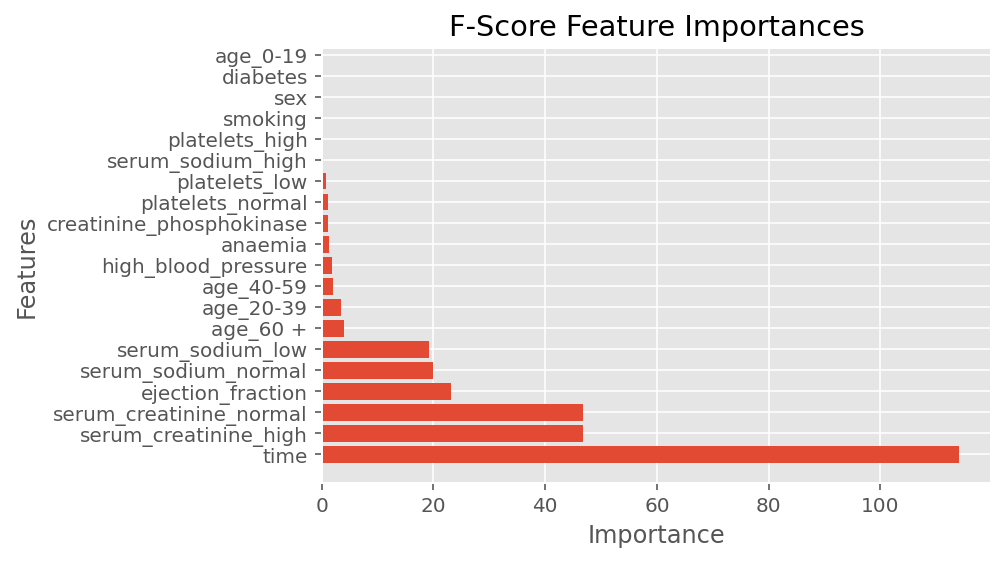

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()
    
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score')    

Plot below shows the number of features selected on x-axis and mean cv results for that features on y-axis. From the plot we can see that maximum score is obtained when number of features is 4.

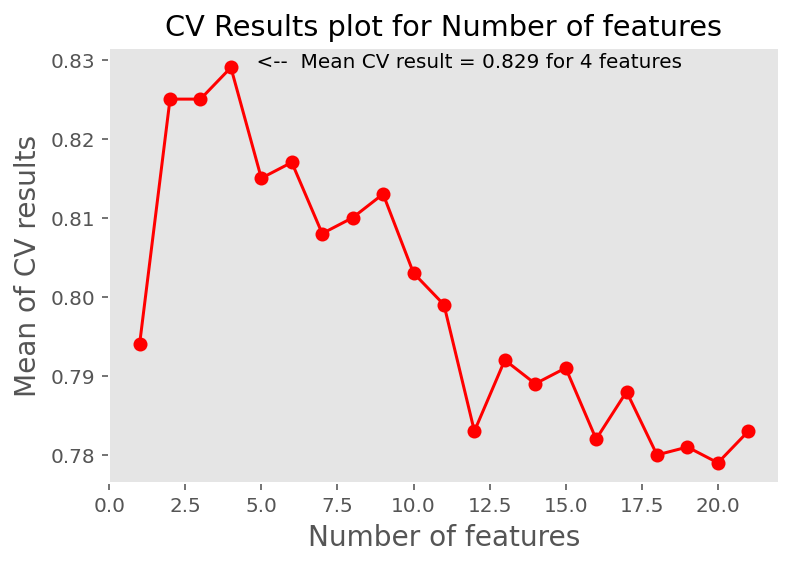

In [15]:
import matplotlib.pyplot as plt
plt.plot(x,y, color='red', marker='o')
plt.xlabel("Number of features", fontsize=14)
plt.ylabel("Mean of CV results", fontsize=14)
plt.title("CV Results plot for Number of features")
plt.grid(False)
plt.annotate("    <--  Mean CV result = 0.829 for 4 features", (4, 0.829))
plt.show()

#### Feature selection using Mutual information
Here we iterate using a for loop starting from 1 to number of columns present. For each iteration, the value of i is equal to the num of features for which we will calculate the performance using Mutual Information from all the given variables in our dataset. 

In [16]:
x1 = []
y1 = []
for i in range(1, 22):
    num_features = i
    fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
    fs_fit_mutual_info.fit_transform(Data, target)
    fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
    #fs_indices_fscore
    best_features_mutual_info = Data.columns[fs_indices_mutual_info].values
    #best_features_fscore
    feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
    #feature_importances_fscore
    Data1 = Data.values
    Data1 = Data1[:, fs_indices_mutual_info]
    cv_results_mutual = cross_val_score(estimator=clf,
                                 X=Data1,
                                 y=target,
                                 cv=cv_method,
                                 scoring=scoring_metric)
    x1.append(i)
    y1.append(cv_results_fscore.mean().round(3))


We can see that best result which is 0.783 is obtained when number of features is 1.

In [17]:
best_CV_mutual = max(y1)
best_numfeature_mutual = x1[y1.index(max(y1))]
print("Maximum CV result - ",max(y1))
print("Number of feature - ",x1[y1.index(max(y1))])

Maximum CV result -  0.783
Number of feature -  1


From this plot we can see the columns and their importance score obtained using Mutual information.

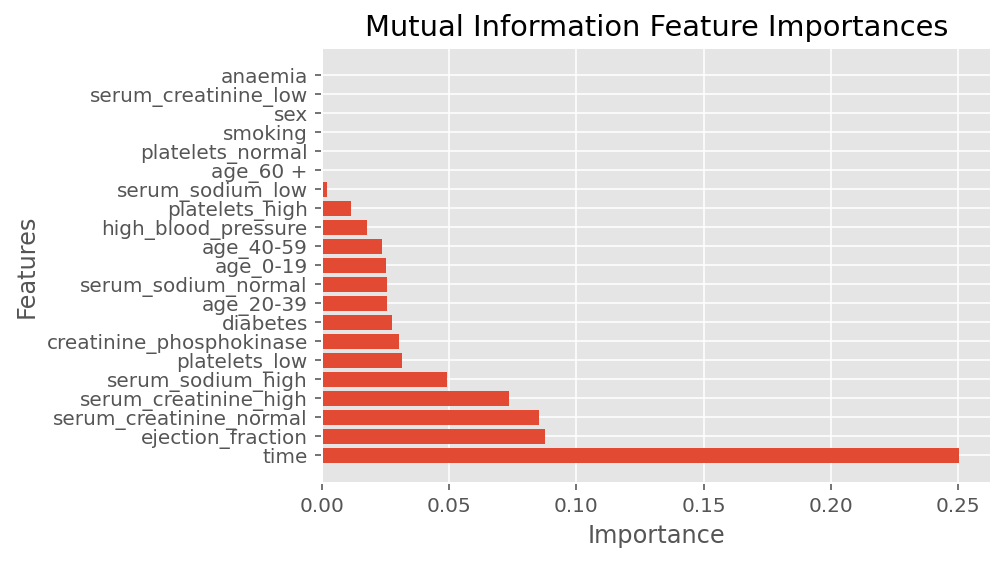

In [18]:
plot_imp(best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information')

Plot below shows the number of features selected on x-axis and mean cv results for that features on y-axis. From the plot we can see that maximum score is obtained when number of features is 1 and its constant as the number of features is increased.

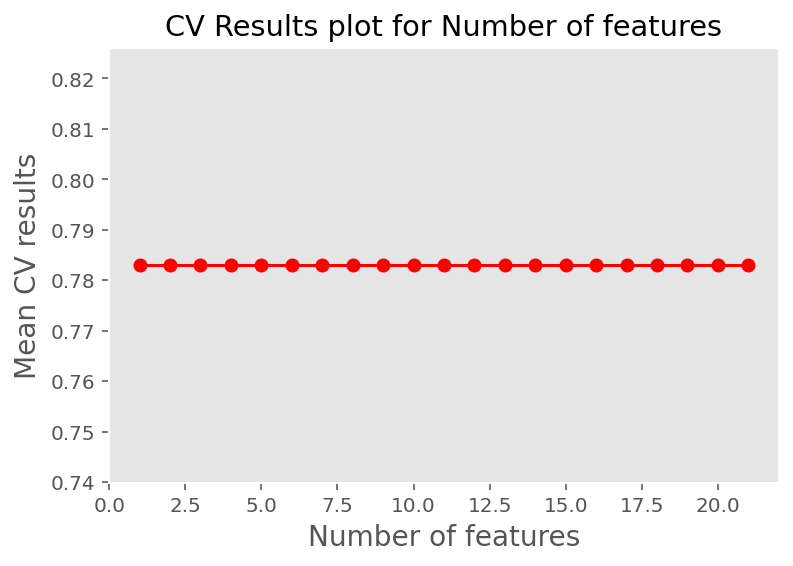

In [19]:
import matplotlib.pyplot as plt
plt.plot(x1,y1, color='red', marker='o')
plt.xlabel("Number of features", fontsize=14)
plt.ylabel("Mean CV results", fontsize=14)
plt.title("CV Results plot for Number of features")
plt.grid(False)
plt.show()

#### Feature selection using Random Forest importance
Over here we iterate using a for loop starting from 1 to number of columns present. For each iteration, the value of i is equal to the num of features for which we will calculate the performance using Random Forest from all the given variables in our dataset. 

In [20]:
x2 = []
y2 = []
for i in range(1, 22):
    num_features = i
    model_rfi = RandomForestClassifier(n_estimators=100)
    model_rfi.fit(Data, target)
    fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]
    #fs_indices_fscore
    best_features_rfi = Data.columns[fs_indices_rfi].values
    #best_features_fscore
    feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
    #feature_importances_fscore
    Data1 = Data.values
    Data1 = Data1[:, fs_indices_rfi]
    cv_results_rfi = cross_val_score(estimator=clf,
                                 X=Data1,
                                 y=target,
                                 cv=cv_method,
                                 scoring=scoring_metric)
    x2.append(i)
    y2.append(cv_results_rfi.mean().round(3))

We can see that best result is obtained when number of features is 4.

In [21]:
best_CV_rfi = max(y2)
best_numfeature_rfi = x2[y2.index(max(y2))]
print("Maximum CV result - ",max(y2))
print("Number of feature - ",x2[y2.index(max(y2))])

Maximum CV result -  0.822
Number of feature -  4


From this plot we can see the columns and their importance score obtained using Random Forest.

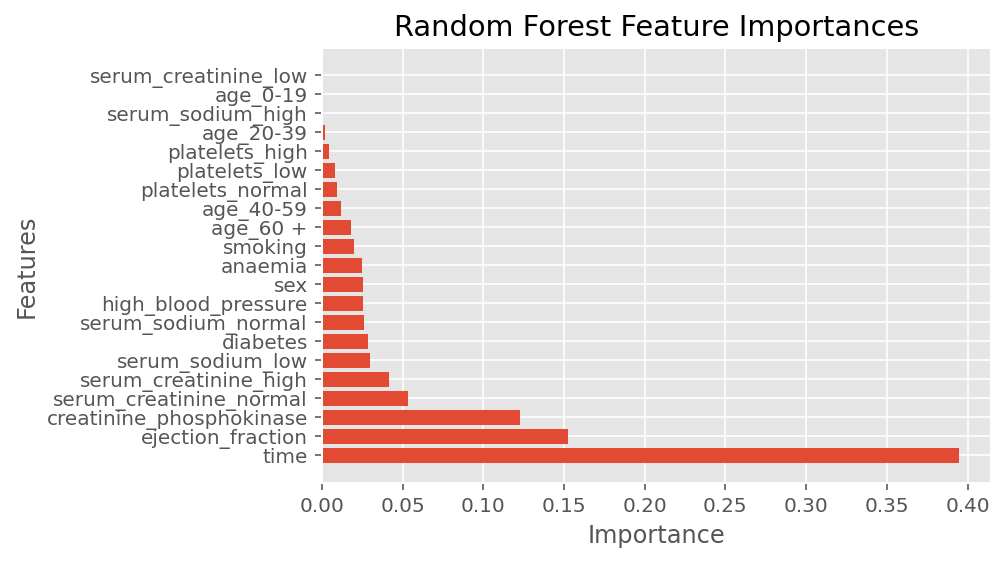

In [22]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

Plot below shows the number of features selected on x-axis and mean cv results for that features on y-axis. From the plot we can see that maximum score is obtained when number of features is 4.

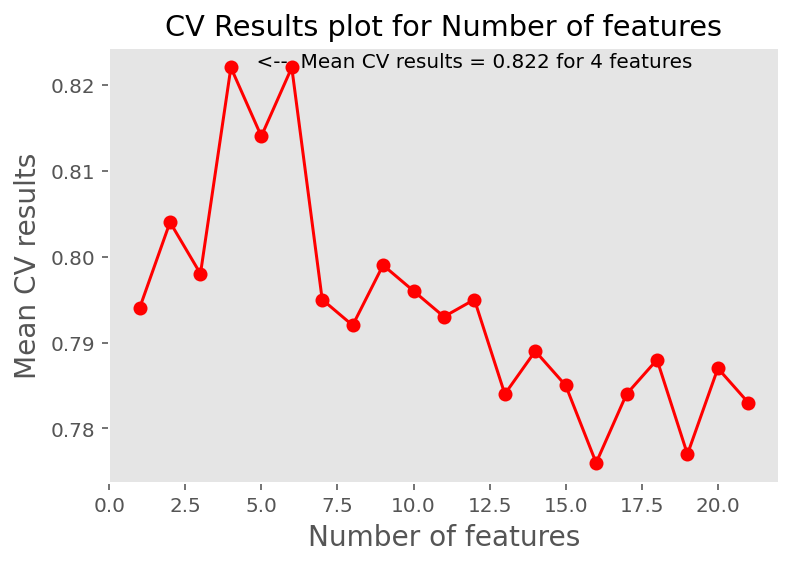

In [23]:
import matplotlib.pyplot as plt
plt.plot(x2,y2, color='red', marker='o')
plt.xlabel("Number of features", fontsize=14)
plt.ylabel("Mean CV results", fontsize=14)
plt.title("CV Results plot for Number of features")
plt.grid(False)
plt.annotate("    <--  Mean CV results = 0.822 for 4 features", (4, 0.822))
plt.show()

Following we have printed CV results obtained from full features, F-score, Mutual information and Random forest information

In [24]:
print('Best Results for all the methods used')
print('Full Set of Features:', cv_results_full.mean().round(3))
print('F-Score:', best_CV_Fscore , " for ", best_numfeature_fscore," features")
print('Mutual Information:', best_CV_mutual , " for ", best_numfeature_mutual," features")
print('RFI:', best_CV_rfi , " for ", best_numfeature_rfi," features")

Best Results for all the methods used
Full Set of Features: 0.778
F-Score: 0.829  for  4  features
Mutual Information: 0.783  for  1  features
RFI: 0.822  for  4  features


Below we calculate the scores again for number of features selected from each methods and then perform a paired t-test for each of the methods used with Full set of Features.

In [25]:
num_features = 4 #num of features = 4 as it gives best result in the analysis before 
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
best_features_fscore = Data.columns[fs_indices_fscore].values
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
Data1 = Data.values
Data1 = Data1[:, fs_indices_fscore]
cv_results_fscore = cross_val_score(estimator=clf,
                                 X=Data1,
                                 y=target, 
                                 cv=cv_method, 
                                 scoring=scoring_metric)
print("Paired T-test of F-score with Full features =",stats.ttest_rel(cv_results_fscore, cv_results_full).pvalue.round(3))

Paired T-test of F-score with Full features = 0.0


In [26]:
num_features = 1 #num of features = 1 as it gives best result in the analysis before
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mutual_info.fit_transform(Data, target)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = Data.columns[fs_indices_mutual_info].values
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
Data1 = Data.values
Data1 = Data1[:, fs_indices_mutual_info]
cv_results_mutual = cross_val_score(estimator=clf,
                                 X=Data1,
                                 y=target,
                                 cv=cv_method,
                                 scoring=scoring_metric)
print("Paired T-test of Mutual information with Full features =",stats.ttest_rel(cv_results_mutual, cv_results_full).pvalue.round(3))

Paired T-test of Mutual information with Full features = 0.225


In [27]:
num_features = 4 #num of features = 4 as it gives best result in the analysis before
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]
best_features_rfi = Data.columns[fs_indices_rfi].values
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
Data1 = Data.values
Data1 = Data1[:, fs_indices_rfi]
cv_results_rfi = cross_val_score(estimator=clf,
                                 X=Data1,
                                 y=target,
                                 cv=cv_method,
                                 scoring=scoring_metric)    
print("Paired T-test of RFI with Full features =",stats.ttest_rel(cv_results_rfi, cv_results_full).pvalue.round(3))

Paired T-test of RFI with Full features = 0.0


From each of the paired t-test it is observed that value of p for Mutual Information is greater than 0.05 so we can say that it is not statistically significant. For F-score and Random Forest, scores are less than 0.05, so they are statistically significant. But among these two F-score has highest CV score, so we use the feature selection obtained from F-score method.

#### Final selection using F-score

Final selection of columns, column number, and it importance is displayed below

In [28]:
num_features = 4
fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target)
fs_indices_fscore = np.argsort(np.nan_to_num(fs_fit_fscore.scores_))[::-1][0:num_features]
print('Selected Column Numbers: ',fs_indices_fscore)
best_features_fscore = Data.columns[fs_indices_fscore].values
print('Selected Column Name: ',best_features_fscore)
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
print('Feature Importance Value: ',feature_importances_fscore)
Data1 = Data.values
Data1 = Data1[:, fs_indices_fscore]
cv_results_fscore = cross_val_score(estimator=clf,
                                 X=Data1,
                                 y=target, 
                                 cv=cv_method, 
                                 scoring=scoring_metric)

print('Performance value: ',cv_results_fscore.mean().round(3))

Selected Column Numbers:  [ 7 17 16  3]
Selected Column Name:  ['time' 'serum_creatinine_high' 'serum_creatinine_normal'
 'ejection_fraction']
Feature Importance Value:  [114.17943739  46.85944785  46.85944785  23.0926427 ]
Performance value:  0.829


#### 2.2. Model Fitting & Tuning: <a class = "anchor" id = "2_2"></a>


##### 2.2.1. KNN classifier: <a class = "anchor" id = "2_2_1"></a>
We try to find best value of k between 1 to 7 by using different distance metric. In this way we try to tune the parameters for our KNN classifier. We do this by using GridSearchCV method and from our results we have found that best result of k is obtained when value of k is 7 using Euclidean distance.

In [29]:
# Algorithm 1 - KNN classifier
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
import numpy as np
params_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 
              'p': [1, 2, 5]}
from sklearn.model_selection import GridSearchCV

gs_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=params_KNN, 
                      cv=cv_method,
                      verbose=0,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)
gs_KNN.fit(Data1, target)

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x0000026737AA3198>,
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'p': [1, 2, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=0)

In [30]:
gs_KNN.best_params_

{'n_neighbors': 7, 'p': 2}

CV score for above parameter combination is displayed below.

In [31]:
gs_KNN.best_score_

0.8494983277591973

In [32]:
gs_KNN.cv_results_['mean_test_score']

array([0.83500557, 0.82831661, 0.8238573 , 0.78929766, 0.79821628,
       0.79487179, 0.82274247, 0.82162765, 0.81716834, 0.82162765,
       0.8238573 , 0.81939799, 0.84280936, 0.8483835 , 0.84280936,
       0.83835006, 0.83946488, 0.83723523, 0.8483835 , 0.84949833,
       0.84615385])

Results obtained for different values of k and p.

In [33]:
import pandas as pd

results_KNN = pd.DataFrame(gs_KNN.cv_results_['params'])
results_KNN['test_score'] = gs_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN.head(5)

,n_neighbors,p,test_score,metric
0,1,1,0.835006,Manhattan
1,1,2,0.828317,Euclidean
2,1,5,0.823857,Minkowski
3,2,1,0.789298,Manhattan
4,2,2,0.798216,Euclidean


Plot below shows us performance scores with k values between 1 to 7 using Manhattan, Euclidean and Minkowski distance metrics. From below plot we can see that Euclidean distance gives best result when value of k is 7.

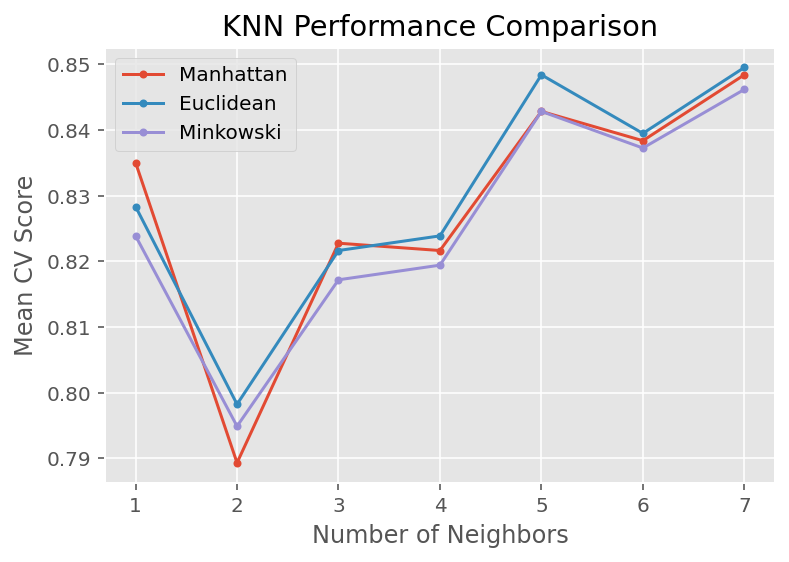

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

##### 2.2.2. Descision Tree classifier: <a class = "anchor" id = "2_2_2"></a>
We try to build a model using Random Forest classifier and we try to obtain best results from our model by setting different parameters and select best results from them. We have used parameters like criterion, depth of tree and minimum sample splits. We perform a Grid search to obtain best results from these parameters that we have set. We have used 'gini' and 'entropy' as our two different criterion. We have set value of depth between 1 to 8. Value for minimum sample split is set a 2 or 3.

In [35]:
# Algorithm 2 - Descision Tree classifier
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=0, 
                     scoring='accuracy')

gs_DT.fit(Data1, target);

Best combination of parameters found after tuning is shown below.

In [36]:
gs_DT.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 2}

CV score for above best combination is 0.8428, its shown below.

In [37]:
gs_DT.best_score_

0.842809364548495

Results obtained from the different parameters used.

In [38]:
results_DT = pd.DataFrame(gs_DT.cv_results_['params'])
results_DT['test_score'] = gs_DT.cv_results_['mean_test_score']
results_DT.head(5)

,criterion,max_depth,min_samples_split,test_score
0,gini,1,2,0.838350
1,gini,1,3,0.838350
2,gini,2,2,0.833891
3,gini,2,3,0.833891
4,gini,3,2,0.831661


For the plot of split criterion and maximum depth. We can see that maximum cv value is obtained when split criterion is entropy and maximum depth is 4.

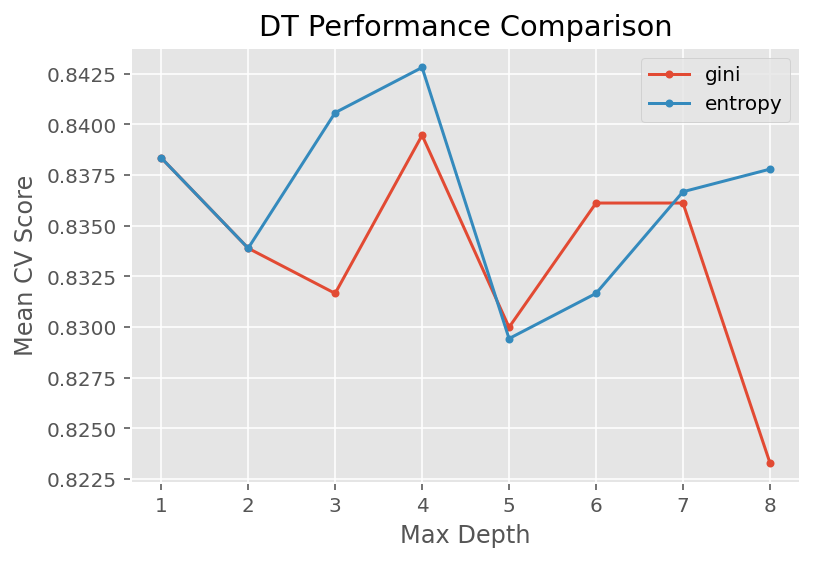

In [39]:
for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

##### 2.2.3. Random Forest Classifier: <a class = "anchor" id = "2_2_3"></a>
We try to build a model using Random Forest classifier and we try to obtain best results from our model by setting different parameters and select best results from them. We have used parameters like criterion, depth of tree and minimum sample splits. We perform a Grid search to obtain best results from these parameters that we have set. We have used 'gini' and 'entropy' as our two different criterion. We have set value of depth between 1 to 8. Value for minimum sample split is set a 2 or 3.

In [40]:
# Algorithm 4 - Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()

params_RF = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gs_RF = GridSearchCV(estimator=RF, 
                     param_grid=params_RF, 
                     cv=cv_method,
                     verbose=0, 
                     scoring='accuracy')


In [41]:
gs_RF.fit(Data1, target)

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x0000026737AA3198>,
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=N

Random forest gives best result when criterion is gini, max depth is 3 and min sample split is 3

In [42]:
gs_RF.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3}

CV result for above paramter combination is 0.856. 

In [43]:
gs_RF.best_score_

0.8561872909698997

Results obtained from the different parameters used.

In [44]:
results_RF = pd.DataFrame(gs_RF.cv_results_['params'])
results_RF['test_score'] = gs_RF.cv_results_['mean_test_score']
results_RF.head(5)

,criterion,max_depth,min_samples_split,test_score
0,gini,1,2,0.799331
1,gini,1,3,0.819398
2,gini,2,2,0.843924
3,gini,2,3,0.836120
4,gini,3,2,0.838350


For the plot of split criterion and maximum depth. We can see that maximum cv value is obtained when split criterion is gini and maximum depth is 3.

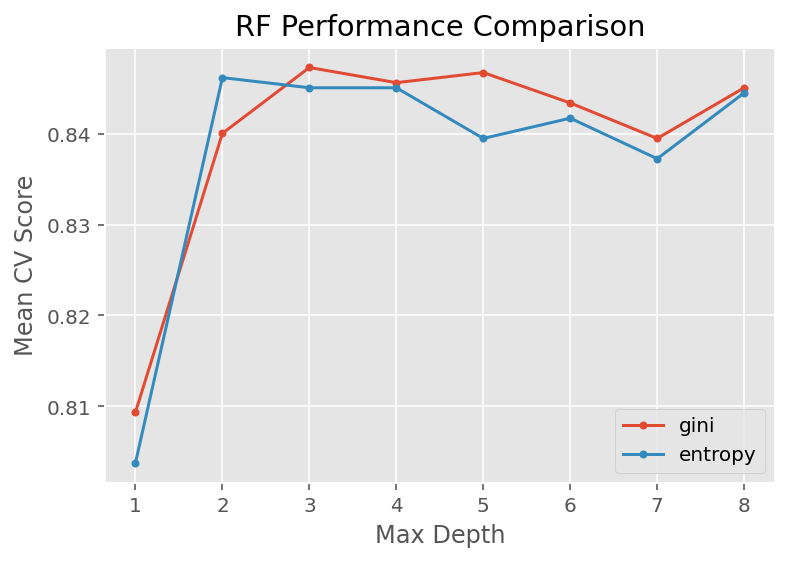

In [45]:
for i in ['gini', 'entropy']:
    temp = results_RF[results_RF['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("RF Performance Comparison")
plt.show()

##### 2.2.4 SVM classifier: <a class = "anchor" id = "2_2_4"></a>
We try to build a model using SVM classifier and we try to obtain best results from our model by setting different parameters and select best results from them. We have used parameters like regularization parameter and kernel. We perform a Grid search to obtain best results from these parameters that we have set.

In [46]:
# Algorithm 5 - SVM classifier
from sklearn.svm import SVC

svm = SVC(gamma='auto')

params_svm = {'C':[1,10,20,30],
              'kernel':['rbf', 'linear', 'poly', 'sigmoid']}

gs_svm = GridSearchCV(estimator=svm, 
                     param_grid=params_svm, 
                     cv=cv_method,
                     verbose=0, 
                     scoring='accuracy')

In [47]:
gs_svm.fit(Data1, target)

GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x0000026737AA3198>,
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 20, 30],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

SVM gives best result when c is equal to 20 and kernel is rbf.

In [48]:
gs_svm.best_params_

{'C': 20, 'kernel': 'rbf'}

CV result for the above paramter setting is 0.8561.

In [49]:
gs_RF.best_score_

0.8561872909698997

Results obtained from the different parameters used.

In [50]:
results_svm = pd.DataFrame(gs_svm.cv_results_['params'])
results_svm['test_score'] = gs_svm.cv_results_['mean_test_score']
results_svm.head(5)

,C,kernel,test_score
0,1,rbf,0.767001
1,1,linear,0.814939
2,1,poly,0.707915
3,1,sigmoid,0.754738
4,10,rbf,0.849498


For the plot of kernel and regularization parameter. We can see that maximum cv value is obtained when kernel is rbf and regularization parameter is 20.

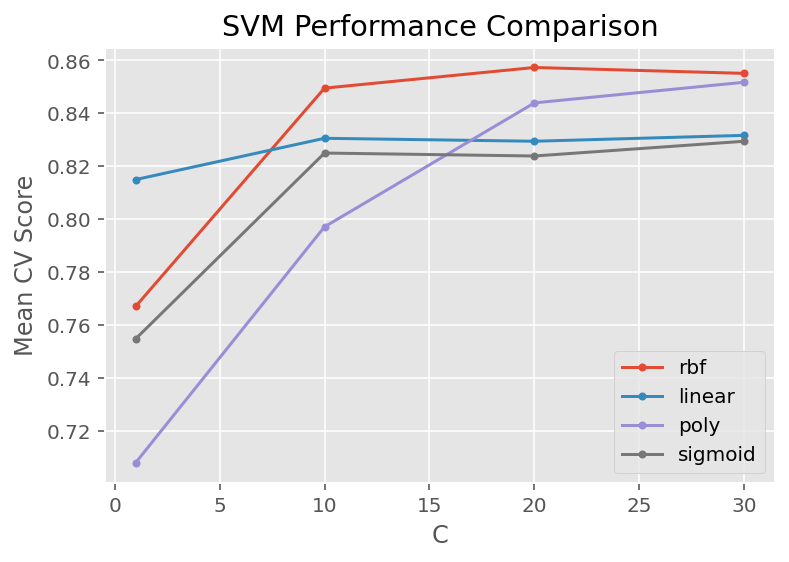

In [51]:
for i in ['rbf', 'linear', 'poly', 'sigmoid']:
    temp = results_svm[results_svm['kernel'] == i]
    temp_average = temp.groupby('C').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
    
plt.legend()
plt.xlabel('C')
plt.ylabel("Mean CV Score")
plt.title("SVM Performance Comparison")
plt.show()

#### 2.3. Model Comparison: <a class = "anchor" id = "2_3"></a>


We have tuned the parameters in above section and got it in the best_estimator_ variable for the respective algorithms. With help of this variable we will evaluate our models by cross validation.

In [59]:
# Evaluation of the models
from sklearn.model_selection import cross_val_score

cv_method_ttest = RepeatedStratifiedKFold(n_splits=5, 
                                          n_repeats=3, 
                                          random_state=555)

cv_results_KNN = cross_val_score(estimator=gs_KNN.best_estimator_,
                                 X=Data1,
                                 y=target, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='accuracy')
print('KNN Classifier: ',cv_results_KNN.mean().round(3))

KNN Classifier:  0.854


In [60]:
cv_results_DT = cross_val_score(estimator=gs_DT.best_estimator_,
                                 X=Data1,
                                 y=target, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='accuracy')
print('Decision Tree Classifier: ',cv_results_DT.mean().round(3))

Decision Tree Classifier:  0.828


In [61]:
cv_results_RF = cross_val_score(estimator=gs_RF.best_estimator_,
                                 X=Data1,
                                 y=target, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='accuracy')
print('Random Forest Classifier: ',cv_results_RF.mean().round(3))

Random Forest Classifier:  0.847


In [62]:
cv_results_svm = cross_val_score(estimator=gs_svm.best_estimator_,
                                 X=Data1,
                                 y=target, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='accuracy')
print('SVM Classifier: ',cv_results_svm.mean().round(3))

SVM Classifier:  0.864


In [63]:
from scipy import stats

knn_dt = stats.ttest_rel(cv_results_DT, cv_results_KNN).pvalue.round(3)
knn_rf = stats.ttest_rel(cv_results_RF, cv_results_KNN).pvalue.round(3)
knn_svm = stats.ttest_rel(cv_results_svm, cv_results_KNN).pvalue.round(3)
dt_rf = stats.ttest_rel(cv_results_DT, cv_results_RF).pvalue.round(3)
dt_svm = stats.ttest_rel(cv_results_DT, cv_results_svm).pvalue.round(3)
svm_rf = stats.ttest_rel(cv_results_svm, cv_results_RF).pvalue.round(3)

Below we can see results of paired t-tests for different algorithms used. We will now see which one of them are statistically significant and which one are not statistically significant. Rows with green color are statistically significant where as rows with red color are not. Then we would select the algorithm with best CV which are statistically significant. For KNN and DT p value is less than 0.05 so we can say that it is statistically significant and CV score of KNN is more than DT, so we would select KNN from both these algorithm. DT and SVM have p value less than 0.05, so they are also statistically significant. SVM has greater CV score than DT hence would select SVM over DT. RF and SVM also have p value less than 0.05 hence it is statistically significant. SVM has greater CV score than RM, so we would select SVM over RF. If we need to select best from all the four algorithms then we will go with SVM and KNN as its CV scores is highest.

In [64]:
df = pd.DataFrame({    
    'T-Test' : ['KNN & DT', 'KNN & RF', 'KNN & SVM', 'DT & RF', 'DT & SVM', 'RF & SVM'],
    'p_value': [knn_dt, knn_rf, knn_svm, dt_rf, dt_svm, svm_rf]
})
df.style.apply(lambda x: ["background: #ff4545" if v > 0.05 else "background: #8ff52a" for v in df.p_value], axis = 0)

,T-Test,p_value
0,KNN & DT,0.042
1,KNN & RF,0.342
2,KNN & SVM,0.177
3,DT & RF,0.085
4,DT & SVM,0.006
5,RF & SVM,0.008


### 3.Critique & Limitations: <a class = "anchor" id = "3"></a>
Parameter tuning for the models used is very specific. More hyper parameter tuning can be done for the models used. For example, in KNN we can set number of neighbours from 1 to total number of observations. As we increased number of neighbours in KNN computation cost increases and would take more time to process and which would have not been possible to do on a local machine, so instead of using GridSearchCV we can use RandomSearchCV. For Decision Tree and Random Forest, we need to set the parameters accordingly for tuning as more or less parameters may underfit or overfit the model. In SVM value of C cannot be set too low or too high because we do not want our algorithm to penalize less or more.

### 4.Summary & Conclusions: <a class = "anchor" id = "4"></a>


#### 4.1.Project Summary: <a class = "anchor" id = "4_1"></a>
In our project in phase 1 for our selected dataset there were no missing values or redundant data, so there was no need to perform any data cleaning. Then we performed some visualizations in which we did one, two and three variable plots. From our plots we found that age, blood pressure, ejection fraction, creatinine phosphokinase were the major factors leading to dead of patients. In second phase we did some feature engineering so that we could select the best features which would accurately predict models. Before doing any feature engineering we had to do label encoding, one hot encoding and min max scaling for our dataset. We then applied KNN, Decision Tree, Random Forest and SVM classifier algorithms for our selected model. We then performed a paired t-test and from that found out than SVM and KNN would give good results as compared to other models.

#### 4.2. Summary of Findings: <a class = "anchor" id = "4_2"></a>
From different feature engineering methods used from paired t-test we found that Fscore gives us the best results. Four features obtained from Fscore would give better results than full set of features. 'time', 'serum_creatinine_high' 'serum_creatinine_normal' and 'ejection_fraction' are four main features that impacts the target column most. We then used these features to train different models. From the 4 different algorithms used we found that SVM and KNN gives more statistically significant and accurate results as compared to the other algorithms used.

#### 4.3. Conclusions: <a class = "anchor" id = "4_3"></a>
From our results we can conclude that the main features or variables that we obtained are good enough to give us accurate results with high percentage. 'time', 'serum_creatinine_high' 'serum_creatinine_normal' and 'ejection_fraction' are four main features that we have found out. From these selected features and based upon their values we can accurately predict whether it may lead to dead or not for a person. 

### 5.References: <a class = "anchor" id = "5"></a>


<ul>
<li>Aksakalli, D. Machine Learning Tutorials | www.featureranking.com. www.featureranking.com. Retrieved 31 May 2021, from https://www.featureranking.com/tutorials/machine-learning-tutorials/. </li>
<li>sklearn.svm.SVC — scikit-learn 0.24.2 documentation. Scikit-learn.org. (2021). Retrieved 31 May 2021, from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.</li>
<li>Hyperparameter Tuning for Support Vector Machines — C and Gamma Parameters. Medium. (2021). Retrieved 31 May 2021, from https://towardsdatascience.com/hyperparameter-tuning-for-support-vector-machines-c-and-gamma-parameters-6a5097416167.</li>
    
</ul>